In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [42]:
MIN_SINGLE_MUTATIONS = 1 # (minimum_number+1) of single mutations per protein

In [36]:
main_df = pd.read_csv("data/main_dataset/main.csv")
# keep only the one with a ddG for now
main_df = main_df[~pd.isna(main_df.ddG)]

main_df.head()

,PDB_wild,uniprot,mutated_chain,mutation_code,pH,Texp,Tm,ddG,dTm,dataset_source,sequence,length,molWeight,countByFeatureType,chain_start,chain_end,AlphaFoldDB
225,1EM7|2GB1|1PGA,P06654,A,M0A,6.5,NaN,NaN,-0.14,NaN,FireProtDB,MEKEKKVKYFLRKSAFGLASVSAAFLVGSTVFAVDSPIEDTPIIRN...,448.0,47567.0,"{'Signal': 1, 'Chain': 1, 'Propeptide': 1, 'Re...",34.0,417.0,P06654
226,1EM7|2GB1|1PGA,P06654,A,M0D,6.5,NaN,NaN,-0.38,NaN,FireProtDB,MEKEKKVKYFLRKSAFGLASVSAAFLVGSTVFAVDSPIEDTPIIRN...,448.0,47567.0,"{'Signal': 1, 'Chain': 1, 'Propeptide': 1, 'Re...",34.0,417.0,P06654
227,1EM7|2GB1|1PGA,P06654,A,M0E,6.5,NaN,NaN,-0.64,NaN,FireProtDB,MEKEKKVKYFLRKSAFGLASVSAAFLVGSTVFAVDSPIEDTPIIRN...,448.0,47567.0,"{'Signal': 1, 'Chain': 1, 'Propeptide': 1, 'Re...",34.0,417.0,P06654
228,1EM7|2GB1|1PGA,P06654,A,M0F,6.5,NaN,NaN,-1.14,NaN,FireProtDB,MEKEKKVKYFLRKSAFGLASVSAAFLVGSTVFAVDSPIEDTPIIRN...,448.0,47567.0,"{'Signal': 1, 'Chain': 1, 'Propeptide': 1, 'Re...",34.0,417.0,P06654
229,1EM7|2GB1|1PGA,P06654,A,M0G,6.5,NaN,NaN,-0.30,NaN,FireProtDB,MEKEKKVKYFLRKSAFGLASVSAAFLVGSTVFAVDSPIEDTPIIRN...,448.0,47567.0,"{'Signal': 1, 'Chain': 1, 'Propeptide': 1, 'Re...",34.0,417.0,P06654


min_prot_len=36 max_prot_len=34350
min_pH=1.2 max_pH=11.0


<AxesSubplot: >

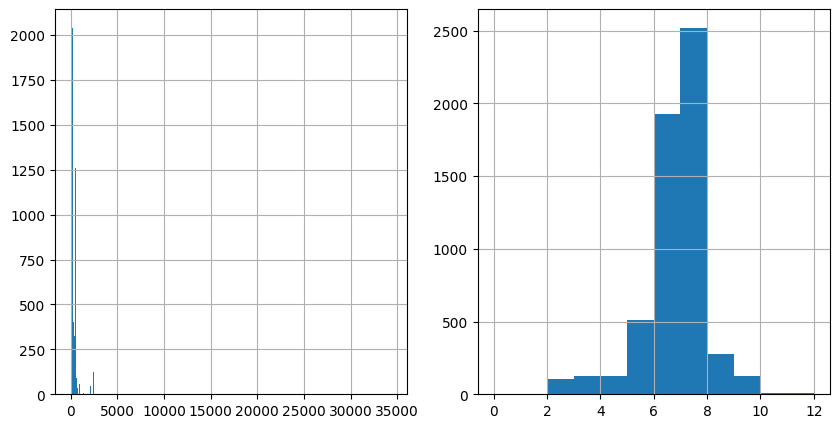

In [37]:
f, axs = plt.subplots(1, 2, figsize=(10,5))

prot_len = main_df.sequence.agg(len)
min_prot_len, max_prot_len = min(prot_len), max(prot_len)
print(f"{min_prot_len=} {max_prot_len=}")
prot_len.hist(bins=range(min_prot_len, max_prot_len, 100), ax=axs[0])

min_pH, max_pH = min(main_df.pH), max(main_df.pH)
print(f"{min_pH=} {max_pH=}")
main_df.pH.hist(bins=range(0, 13, 1), ax=axs[1])


In [44]:
uniprot_ids = main_df.uniprot.value_counts()
uniprot_ids = uniprot_ids[uniprot_ids.gt(MIN_SINGLE_MUTATIONS)]
print(f"got {len(uniprot_ids)} distinct proteins with more than {MIN_SINGLE_MUTATIONS} single mutations")
print(f"max single mutations: {uniprot_ids.max()} for {uniprot_ids[uniprot_ids.argmax()]}, {uniprot_ids.min()=}, {uniprot_ids.mean()=}, {uniprot_ids.std()=} ")

got 216 distinct proteins with more than 1 single mutations
max single mutations: 1190 for 1190, uniprot_ids.min()=2, uniprot_ids.mean()=26.37962962962963, uniprot_ids.std()=97.0844961725171 


In [46]:
for col in main_df.columns.to_list():
    print(col, main_df[col].isna().sum())

PDB_wild 31
uniprot 0
mutated_chain 0
mutation_code 0
pH 12
Texp 3536
Tm 5709
ddG 0
dTm 5232
dataset_source 0
sequence 0
length 0
molWeight 0
countByFeatureType 0
chain_start 0
chain_end 0
AlphaFoldDB 322
